<a href="https://colab.research.google.com/github/ZefraAlseif/Project1_Wine_Network/blob/main/RegressionModel_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adapting the original wine data to a regression model and classification model

In [5]:
#@title Data as Numpy Arrays
import matplotlib.pyplot as plt
import numpy as np
# This time we need to also import pandas
import pandas as pd
from io import StringIO

# Read in white wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')

# Read in red wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

red['type'] = 1
white['type'] = 0

wines = red.append(white, ignore_index = True)

# Import SKLEARN
import sklearn

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Specify the data -
X1 = wines.iloc[:, 0:11]
X2 = wines.iloc[:,12]
X = pd.concat([X1,X2],axis = 1)

y = np.ravel(wines.quality)

# Splitting the data set for training and validating - Done with SKLEARN
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25, random_state = 45)

# Converting X_train & X_test DataFrame s to TF sensors
# Will use NumPy, TF, & Keras after this
# import tensorflow as tf

Xtrain = X_train.to_numpy()
X_valid = X_valid.to_numpy()

X_valid
# In reality:
# [1] ALL THE Xtrain patterns (with their y_train targets)
# will be used for TRAINING ([TR]), as Xtrain & y_train
# [2] MOST OF THE X_valid patterns (and their y_valid targets)
# will be used for VALIDATION ([TT]), as X_val & y_val
# BUT WE WILL SET ASIDE THE LAST 10 for "testing" ([TS])
# as X_tst & y_tst

# Retain the first 1615 patterns for validation ([TT])
Xval = X_valid[:1615]
Xval.shape

# and now set aside the last 10 for test
Xtst = X_valid[1615:]
Xtst.shape

# Same for the corresponding targets
# Retain the first 1615 for validation ([TT])
y_val = y_valid[:1615]
y_val.shape

y_tst = y_valid[1615:]
y_tst.shape 
y_tst

# Now, in addition, create the targets as one-hot-encoded 4 quality levels
# We will track these few targets through the conversion process
y_train[272:283]

# Function create rank-1 arrays where 3,4,5,6,7,8,9 are mapped to 1 or 2 or 3 or 4 
def to_4cs(x):
  lx = len(x)
  results = np.zeros(lx)
  for i in range(lx):
    # print("start")
    xa = x[i];
    if xa <= 3:
      results[i] = 1
    elif xa <= 6:
      results[i] = 2
    elif xa <= 8:
      results[i] = 3
    else:
      results[i] = 4
    # results [i, label] = 1
  results = results.astype(int)
  return results

train_labels = to_4cs(y_train)
val_labels = to_4cs(y_val)
tst_labels = to_4cs(y_tst)

# Let's verify that the training targets that we are tracking 
# were converted to levels (1 = BAD; 2 = Medium; 3 = GOOD; 4- Excellent) correctly:
train_labels[272:283]

# Now, one shot encoding of all 3 target arrays
# define a function to do the 

def to_one_hot(labels, dimension = 4):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels-1):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_val_labels = to_one_hot(val_labels)
one_hot_tst_labels = to_one_hot(tst_labels)

#Let's verify that the training targets we have tracked were
# one-hot encoded correctly
Xtrain.shape

# SO, AFTER EXECUTING THIS CELL, YOU WILL HAVE:
# FOR TRAINING:
# Xtrain (4872, 12)...y_train (4872,)...train_labels(4872,)....one_hot_train_labels (4872,4)
# FOR VALIDATING:
# Xval (1615, 12)...y_val (1615,)...val_labels(1615,)...one_hot_val_labels (1615,4)
# FOR TESTING:
# Xtst (10, 12)...y_tst (10,)...tst_labels(10,)... one_hot_tst_labels (10,4)
# PLEASE DO NOT CHANGE THE NAMES OF THESE VARIABLES (So that instructor can use them)


(4872, 12)

# II.1 Regression Model 1 (regmodl1)

In [19]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl1():
  regmodl1 = keras.Sequential(
      [
        layers.Dense(5, activation = 'relu'),
        layers.Dense(1)
      ]
)
  regmodl1.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return regmodl1

regmodl1 = build_regmodl1()
history_regmodl1 = regmodl1.fit(x = Xtrain,y = train_labels, batch_size = 32, epochs = 50, verbose = 2, validation_data = (Xval,val_labels), validation_freq = 1)

regmodl1.summary()

Epoch 1/50
153/153 - 1s - loss: 147.0975 - mae: 7.2942 - val_loss: 2.7238 - val_mae: 1.2556 - 857ms/epoch - 6ms/step
Epoch 2/50
153/153 - 0s - loss: 0.8862 - mae: 0.6733 - val_loss: 0.3907 - val_mae: 0.4613 - 265ms/epoch - 2ms/step
Epoch 3/50
153/153 - 0s - loss: 0.3873 - mae: 0.4822 - val_loss: 0.6410 - val_mae: 0.6522 - 265ms/epoch - 2ms/step
Epoch 4/50
153/153 - 0s - loss: 0.3462 - mae: 0.4571 - val_loss: 0.3002 - val_mae: 0.4233 - 267ms/epoch - 2ms/step
Epoch 5/50
153/153 - 0s - loss: 0.3101 - mae: 0.4341 - val_loss: 0.3521 - val_mae: 0.4765 - 271ms/epoch - 2ms/step
Epoch 6/50
153/153 - 0s - loss: 0.2910 - mae: 0.4226 - val_loss: 0.2537 - val_mae: 0.3835 - 270ms/epoch - 2ms/step
Epoch 7/50
153/153 - 0s - loss: 0.2768 - mae: 0.4101 - val_loss: 0.2564 - val_mae: 0.3695 - 271ms/epoch - 2ms/step
Epoch 8/50
153/153 - 0s - loss: 0.2672 - mae: 0.3991 - val_loss: 0.2872 - val_mae: 0.4365 - 346ms/epoch - 2ms/step
Epoch 9/50
153/153 - 0s - loss: 0.2552 - mae: 0.3933 - val_loss: 0.2741 - val_

## Plot of Regression Model 1 and Final Values









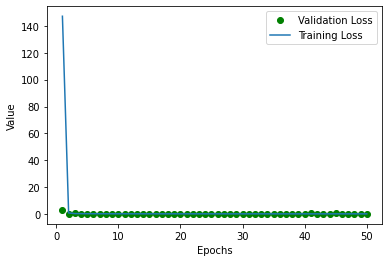

Final Training loss:  0.19736634194850922 
Final Training MAE:  0.34623849391937256
Final Validation loss:  0.28467121720314026 
Final Validation MAE:  0.3992602229118347


In [20]:
# Plot the validation and training loss
plt.plot(range(1, len(history_regmodl1.history['val_loss']) + 1), history_regmodl1.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_regmodl1.history['loss']) + 1), history_regmodl1.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_regmodl1.history['loss'][-1],"\nFinal Training MAE: ", history_regmodl1.history['mae'][-1])
print("Final Validation loss: ",history_regmodl1.history['val_loss'][-1],"\nFinal Validation MAE: ", history_regmodl1.history['val_mae'][-1])

# II.2 Regression Model 2 (regmodl2)

In [21]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl2():
  regmodl2 = keras.Sequential(
      [
        layers.Dense(12, activation = 'relu'),
        layers.Dense(8, activation = 'relu'),
        layers.Dense(5, activation = 'relu'),
        layers.Dense(3, activation='relu'), 
        layers.Dense(1, activation='relu')
      ]
  )
  regmodl2.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return regmodl2

regmodl2 = build_regmodl2()
history_regmodl2 = regmodl2.fit(x = Xtrain,y = train_labels, batch_size = 64, epochs = 100, verbose = 2, validation_data = (Xval,val_labels), validation_freq = 1)

#regmodl2.summary()

Epoch 1/100
77/77 - 1s - loss: 1.4326 - mae: 0.9937 - val_loss: 1.0008 - val_mae: 0.8238 - 1s/epoch - 15ms/step
Epoch 2/100
77/77 - 0s - loss: 0.8877 - mae: 0.7637 - val_loss: 0.7477 - val_mae: 0.7050 - 168ms/epoch - 2ms/step
Epoch 3/100
77/77 - 0s - loss: 0.6245 - mae: 0.6330 - val_loss: 0.4600 - val_mae: 0.5544 - 176ms/epoch - 2ms/step
Epoch 4/100
77/77 - 0s - loss: 0.3005 - mae: 0.4119 - val_loss: 0.1785 - val_mae: 0.2849 - 177ms/epoch - 2ms/step
Epoch 5/100
77/77 - 0s - loss: 0.1647 - mae: 0.2973 - val_loss: 0.1669 - val_mae: 0.3004 - 169ms/epoch - 2ms/step
Epoch 6/100
77/77 - 0s - loss: 0.1602 - mae: 0.2944 - val_loss: 0.1656 - val_mae: 0.3313 - 182ms/epoch - 2ms/step
Epoch 7/100
77/77 - 0s - loss: 0.1579 - mae: 0.2942 - val_loss: 0.1615 - val_mae: 0.3123 - 199ms/epoch - 3ms/step
Epoch 8/100
77/77 - 0s - loss: 0.1566 - mae: 0.2933 - val_loss: 0.1610 - val_mae: 0.3133 - 197ms/epoch - 3ms/step
Epoch 9/100
77/77 - 0s - loss: 0.1559 - mae: 0.2948 - val_loss: 0.1634 - val_mae: 0.2759 -

## Plot of Regression Model 2

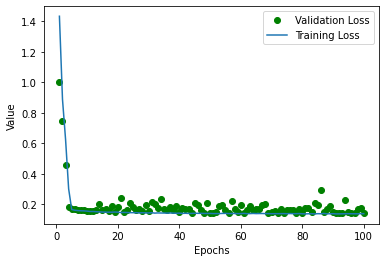

Final Training loss:  0.13752268254756927 
Final Training MAE:  0.27712732553482056
Final Validation loss:  0.14458781480789185 
Final Validation MAE:  0.2644997537136078


In [22]:
# Plot the validation and training loss
plt.plot(range(1, len(history_regmodl2.history['val_loss']) + 1), history_regmodl2.history['val_loss'], 'go',label = "Validation Loss")
plt.plot(range(1, len(history_regmodl2.history['loss']) + 1), history_regmodl2.history['loss'], label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_regmodl2.history['loss'][-1],"\nFinal Training MAE: ", history_regmodl2.history['mae'][-1])
print("Final Validation loss: ",history_regmodl2.history['val_loss'][-1],"\nFinal Validation MAE: ", history_regmodl2.history['val_mae'][-1])

# II.3 Regression Model 3 (regmodl3)

In [23]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl3():
  regmodl3 = keras.Sequential(
      [
        layers.Dense(20, activation = 'relu'),
        layers.Dense(15, activation = 'relu'),
        layers.Dense(10, activation = 'relu'),
        layers.Dense(1, activation = 'relu')
      ]
  )
  regmodl3.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return regmodl3

regmodl3 = build_regmodl3()
history_regmodl3 = regmodl3.fit(x = Xtrain,y = train_labels, batch_size = 128, epochs = 50, verbose = 2, validation_data = (Xval,val_labels), validation_freq = 1)

regmodl3.summary()

Epoch 1/50
39/39 - 1s - loss: 8.6722 - mae: 1.7461 - val_loss: 0.7207 - val_mae: 0.6625 - 945ms/epoch - 24ms/step
Epoch 2/50
39/39 - 0s - loss: 0.3858 - mae: 0.4780 - val_loss: 0.2675 - val_mae: 0.4201 - 107ms/epoch - 3ms/step
Epoch 3/50
39/39 - 0s - loss: 0.2970 - mae: 0.4216 - val_loss: 0.2131 - val_mae: 0.3777 - 103ms/epoch - 3ms/step
Epoch 4/50
39/39 - 0s - loss: 0.2678 - mae: 0.3995 - val_loss: 0.1871 - val_mae: 0.3284 - 102ms/epoch - 3ms/step
Epoch 5/50
39/39 - 0s - loss: 0.2518 - mae: 0.3938 - val_loss: 0.3704 - val_mae: 0.4634 - 109ms/epoch - 3ms/step
Epoch 6/50
39/39 - 0s - loss: 0.2453 - mae: 0.3871 - val_loss: 0.1935 - val_mae: 0.3784 - 101ms/epoch - 3ms/step
Epoch 7/50
39/39 - 0s - loss: 0.2311 - mae: 0.3804 - val_loss: 0.3833 - val_mae: 0.4758 - 103ms/epoch - 3ms/step
Epoch 8/50
39/39 - 0s - loss: 0.2326 - mae: 0.3771 - val_loss: 0.2311 - val_mae: 0.3372 - 108ms/epoch - 3ms/step
Epoch 9/50
39/39 - 0s - loss: 0.2256 - mae: 0.3710 - val_loss: 0.2106 - val_mae: 0.4097 - 98ms/

## Plot of Regression Model 3

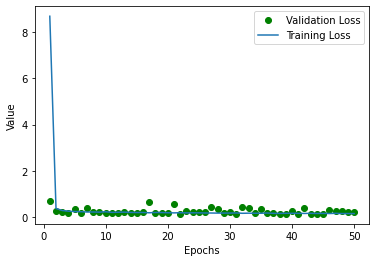

Final Training loss:  0.16316790878772736 
Final Training MAE:  0.3089996576309204
Final Validation loss:  0.2511488199234009 
Final Validation MAE:  0.45180341601371765


In [24]:
# Plot the validation and training loss
plt.plot(range(1, len(history_regmodl3.history['val_loss']) + 1), history_regmodl3.history['val_loss'], 'go',label = "Validation Loss")
plt.plot(range(1, len(history_regmodl3.history['loss']) + 1), history_regmodl3.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_regmodl3.history['loss'][-1],"\nFinal Training MAE: ", history_regmodl3.history['mae'][-1])
print("Final Validation loss: ",history_regmodl3.history['val_loss'][-1],"\nFinal Validation MAE: ", history_regmodl3.history['val_mae'][-1])

## Predicting the Output

In [25]:
predict_labels = np.around(regmodl3.predict(Xtst))
predict_labels_T=predict_labels.T
error = tst_labels - predict_labels_T
predict_table = pd.DataFrame(Xtst)
predict_table['activation'] = predict_labels
predict_table['target'] = tst_labels.T
predict_table['error'] = error.T
# Renaming the columns of the table
predict_table.columns.values[0] = "f1"
predict_table.columns.values[1] = "f2"
predict_table.columns.values[2] = "f3"
predict_table.columns.values[3] = "f4"
predict_table.columns.values[4] = "f5"
predict_table.columns.values[5] = "f6"
predict_table.columns.values[6] = "f7"
predict_table.columns.values[7] = "f8"
predict_table.columns.values[8] = "f9"
predict_table.columns.values[9] = "f10"
predict_table.columns.values[10] = "f11"
predict_table.columns.values[11] = "f12"
display(predict_table)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,activation,target,error
0,7.4,0.44,0.20,11.5,0.049,44.0,157.0,0.99800,3.27,0.44,9.000000,0.0,3.0,2,-1.0
1,6.5,0.23,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.800000,0.0,2.0,2,0.0
2,5.6,0.41,0.24,1.9,0.034,10.0,53.0,0.98815,3.32,0.50,13.500000,0.0,2.0,3,1.0
3,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.400000,1.0,2.0,2,0.0
4,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.99340,3.08,0.45,9.100000,0.0,2.0,2,0.0
5,6.9,0.41,0.33,10.1,0.043,28.0,152.0,0.99680,3.20,0.52,9.400000,0.0,2.0,2,0.0
6,5.9,0.32,0.33,2.1,0.027,35.0,138.0,0.98945,3.37,0.42,12.700000,0.0,3.0,2,-1.0
7,6.0,0.24,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,11.733333,0.0,3.0,2,-1.0
8,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.000000,1.0,2.0,3,1.0
9,7.4,0.24,0.22,10.7,0.042,26.0,81.0,0.99540,2.86,0.36,9.700000,0.0,2.0,2,0.0
